## TensorFlow and tf.keras
https://www.tensorflow.org/tutorials/keras/classification

***

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

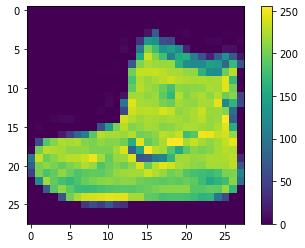

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
train_images = train_images / 255.0

test_images = test_images / 255.0

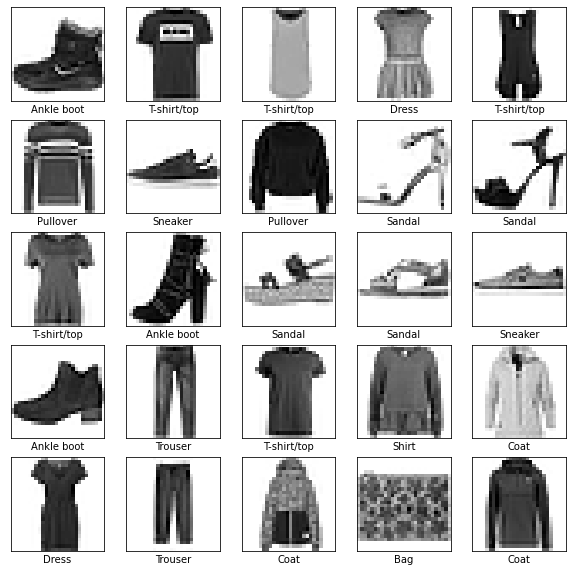

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 767us/step - loss: 0.4987 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 1s 763us/step - loss: 0.3718 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 1s 779us/step - loss: 0.3352 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 1s 774us/step - loss: 0.3104 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 1s 785us/step - loss: 0.2925 - accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 2s 808us/step - loss: 0.2787 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 1s 783us/step - loss: 0.2665 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 1s 787us/step - loss: 0.2555 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.2462 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 1s 769u

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3834 - accuracy: 0.8677

Test accuracy: 0.8676999807357788


In [30]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [31]:
predictions = probability_model.predict(test_images)

In [32]:
predictions[0]

array([1.9604973e-07, 6.0677618e-10, 2.5057009e-08, 5.3831267e-10,
       7.1063679e-09, 6.6258102e-03, 8.7820126e-08, 3.3515124e-03,
       4.4150219e-08, 9.9002236e-01], dtype=float32)

In [33]:
np.argmax(predictions[0])

9

In [34]:
test_labels[0]

9

In [35]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

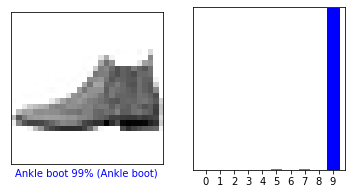

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

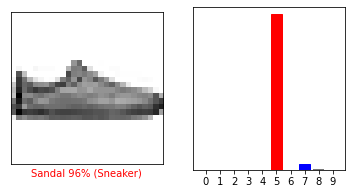

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

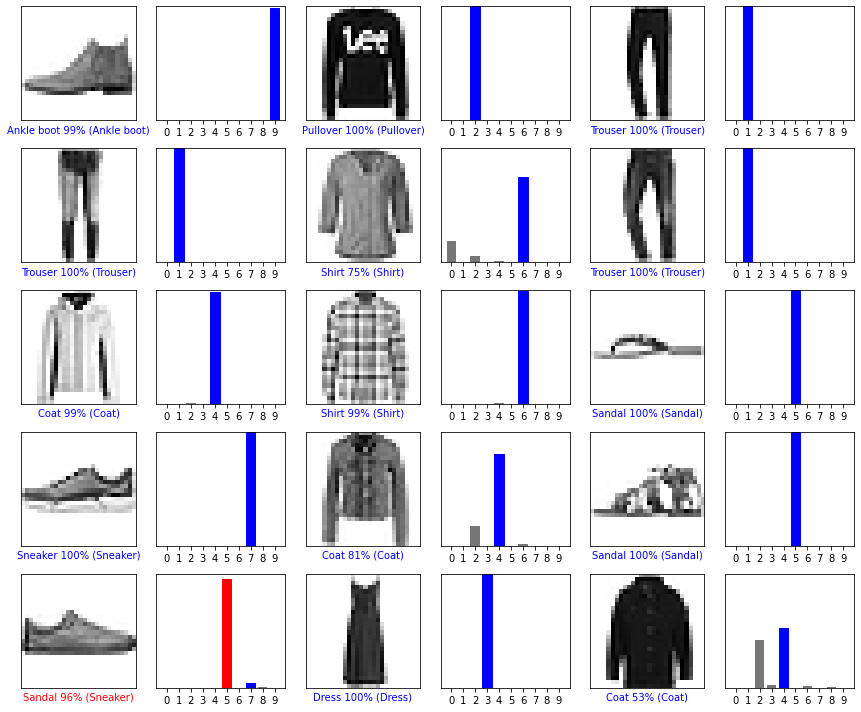

In [42]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [43]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [44]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [45]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.3237099e-04 2.7474550e-14 9.9916589e-01 2.1380937e-09 4.2328451e-04
  1.2201268e-11 2.7848303e-04 7.8667655e-13 3.6786375e-08 2.1485078e-11]]


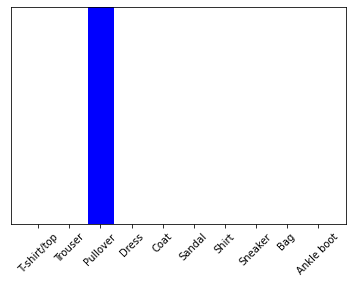

In [46]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [47]:
np.argmax(predictions_single[0])

2